In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [8]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm

In [22]:
# file_v1HG = 'datasets/va_day_250hpa_HadGEM3-2000_2014.nc'
# file_v2HG = 'datasets/okva_day_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19790101-19991230.nc'

# file_u1HG = 'datasets/uaday200hpa_99_mx.nc'
# file_u2HG = 'datasets/uaday200hpa_14_mx.nc'

In [28]:
# vHG1 = xr.open_dataset(file_v1HG)
# vHG2 = xr.open_dataset(file_v2HG)
# uHG1 = xr.open_dataset(file_u1HG)
# uHG2 = xr.open_dataset(file_u2HG)

In [29]:
# uHG299 = uHG1['ua']
# uHG214 = uHG2['ua']

# vHG199 = vHG1['va']
# vHG214 = vHG2['va']

In [39]:
# v200HG = xr.concat([vHG199, vHG214], dim='time')

In [40]:
# u200HG = xr.concat([uHG299, uHG214], dim='time')

In [44]:
# u200HG.to_netcdf('datasets/uday_250hpa_HG_1979_2014.nc')

In [45]:
# v200HG.to_netcdf('datasets/vday_250hpa_HG_1979_2024.nc')

In [58]:
file_uHG = 'datasets/anom_day_uHG.nc'
file_vHG = 'datasets/anom_day_vHG.nc'

In [62]:
uHGds = xr.open_dataset(file_uHG)
uHG = uHGds['ua'] 

vHGds = xr.open_dataset(file_vHG)
vHG = vHGds['va']

In [107]:
vHG = vHG.sel(lat=slice(10,40),lon=slice(227,297))
uHG = uHG.sel(lat=slice(10,40),lon=slice(227,297))

In [108]:
mean_u = uHG.mean(dim='time') 
mean_v = vHG.mean(dim='time')

In [81]:
magn_n = np.sqrt(mean_u**2 + mean_v**2)
magn_n.max()

<xarray.DataArray ()> Size: 8B
array(0.00979203)

In [71]:
magn_n.min()

<xarray.DataArray ()> Size: 8B
array(3.55532211e-05)

Text(0.5, 1.0, 'Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)')

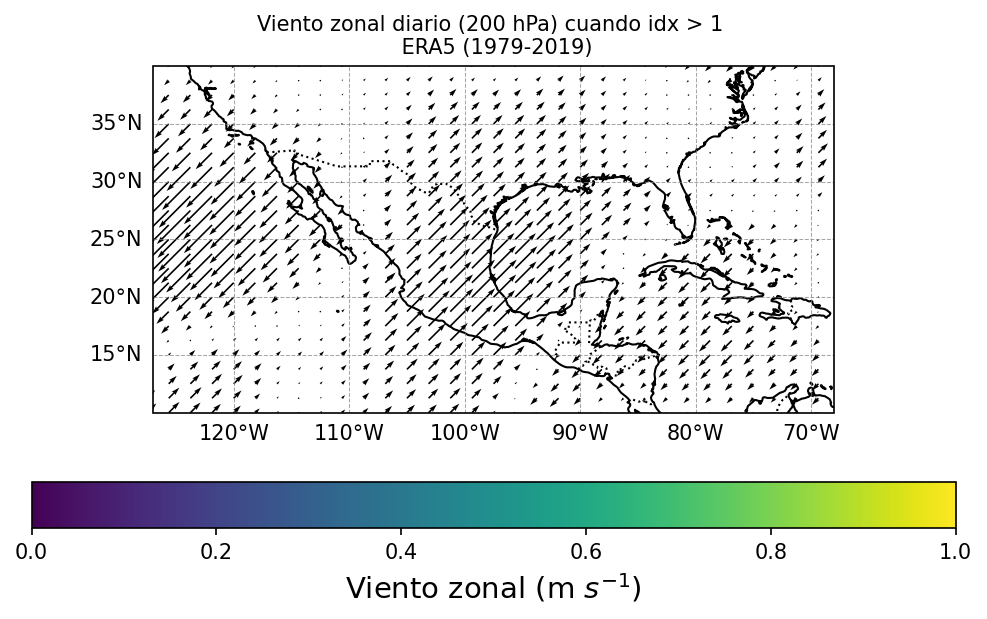

In [109]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines()

# Asegura que lon y lat sean mallas 2D
lon2d, lat2d = np.meshgrid(mean_u.lon, mean_u.lat)
cs = ax1.quiver(lon2d, lat2d, mean_u.values, mean_v.values, transform=ccrs.PlateCarree())

ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())

gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False

plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)

plt.title('Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)', fontsize=10)


In [110]:
print(mean_u.shape)
print(mean_v.shape)
print(mean_u.lon.shape)
print(mean_u.lat.shape)


(25, 37)
(25, 37)
(37,)
(25,)
